Importing Libraries



In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("data.csv")
df

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
101,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0
102,Male,22,3.0,Hostel,No,Yes,Car,NaN,Yes,Yes,No,No,150.0
103,Female,21,2.0,Home,Yes,No,No,No,No,Yes,No,Yes,200.0


# Data Info

### COLUMNS

This data is from Open Source survey for study on the Monthly Expenses of University Students. We are intrigued to see the monthly expenses of on-campus students and off-campus students (study from home).

### Data types of Columns

Gender                    object
Age                        int64
Study_year               float64
Living                    object
Scholarship               object
Part_time_job             object
Transporting              object
Smoking                   object
Drinks                    object
Games_&_Hobbies           object
Cosmetics_&_Self-care     object
Monthly_Subscription      object
Monthly_expenses_$       float64



## Dataframe imported

## Data Types of dataframe

In [5]:
df.dtypes

Gender                    object
Age                        int64
Study_year               float64
Living                    object
Scholarship               object
Part_time_job             object
Transporting              object
Smoking                   object
Drinks                    object
Games_&_Hobbies           object
Cosmetics_&_Self-care     object
Monthly_Subscription      object
Monthly_expenses_$       float64
dtype: object

## Distribution of our target feature i.e. Monthly Expenses

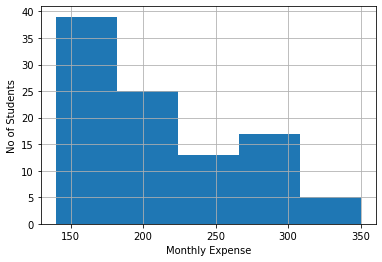

In [6]:
# histogran to evaluate target distribution

(df['Monthly_expenses_$'].hist(bins=5))
plt.ylabel('No of Students')
plt.xlabel('Monthly Expense')
plt.show()

## Printing each feature's unique values and data type

In [7]:
for i in df:
    print(i,end=" ")
    print("=>   Unique Values:-", end=" ")
    print(df[i].unique(),end="\t")
    print(f"Dtype of {i}:-",end=" ")
    print(df[i].dtype)
    

Gender =>   Unique Values:- ['Female ' 'Male ']	Dtype of Gender:- object
Age =>   Unique Values:- [21 25 23 19 22 18 17]	Dtype of Age:- int64
Study_year =>   Unique Values:- [ 2.  3.  1.  4. nan]	Dtype of Study_year:- float64
Living =>   Unique Values:- ['Home' 'Hostel' nan]	Dtype of Living:- object
Scholarship =>   Unique Values:- ['No' 'Yes']	Dtype of Scholarship:- object
Part_time_job =>   Unique Values:- ['No' 'Yes' nan]	Dtype of Part_time_job:- object
Transporting =>   Unique Values:- ['No' 'Motorcycle' 'Car' nan]	Dtype of Transporting:- object
Smoking =>   Unique Values:- ['No' nan 'Yes']	Dtype of Smoking:- object
Drinks =>   Unique Values:- ['No' 'Yes' nan]	Dtype of Drinks:- object
Games_&_Hobbies =>   Unique Values:- ['No' 'Yes']	Dtype of Games_&_Hobbies:- object
Cosmetics_&_Self-care =>   Unique Values:- ['Yes' 'No' nan]	Dtype of Cosmetics_&_Self-care:- object
Monthly_Subscription =>   Unique Values:- ['No' 'Yes' nan]	Dtype of Monthly_Subscription:- object
Monthly_expenses_$ =

By studying the hostogram for our dependent variable

#### We observe that Study year has been assigned a float64 datatype while it should be a int value



 There are also many "nan" values present. We will have to either drop them, but seeing the size of dataset it would not be ideal, so will replace them with most frequently occuring value or the mean value, or replace them by the category "missing"

In [8]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Transporting             0.133333
Drinks                   0.123810
Cosmetics_&_Self-care    0.123810
Smoking                  0.104762
Monthly_Subscription     0.085714
Monthly_expenses_$       0.057143
Part_time_job            0.047619
Study_year               0.038095
Living                   0.019048
dtype: float64

Percentage of unique values in each feature

In [9]:
for var in df:
    print(df[var].value_counts(normalize=True)*100)

Female     50.47619
Male       49.52381
Name: Gender, dtype: float64
19    31.428571
22    30.476190
18    18.095238
21     7.619048
23     7.619048
17     3.809524
25     0.952381
Name: Age, dtype: float64
2.0    40.594059
4.0    27.722772
3.0    20.792079
1.0    10.891089
Name: Study_year, dtype: float64
Home      65.048544
Hostel    34.951456
Name: Living, dtype: float64
No     74.285714
Yes    25.714286
Name: Scholarship, dtype: float64
No     69.0
Yes    31.0
Name: Part_time_job, dtype: float64
Car           38.461538
Motorcycle    32.967033
No            28.571429
Name: Transporting, dtype: float64
No     76.595745
Yes    23.404255
Name: Smoking, dtype: float64
No     91.304348
Yes     8.695652
Name: Drinks, dtype: float64
Yes    67.619048
No     32.380952
Name: Games_&_Hobbies, dtype: float64
Yes    55.434783
No     44.565217
Name: Cosmetics_&_Self-care, dtype: float64
No     52.083333
Yes    47.916667
Name: Monthly_Subscription, dtype: float64
200.0    22.222222
150.0    20.202

We plot the bar graphs comparing the mean and the standard deviation of our target feature (monthly expense) by replacing values of nan with 1 and other values with 0

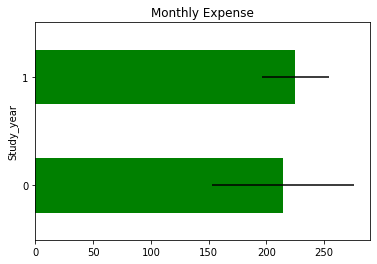

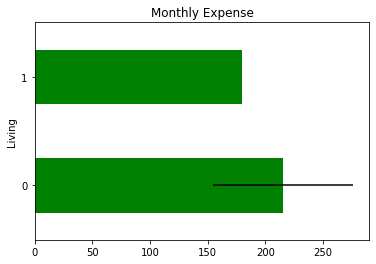

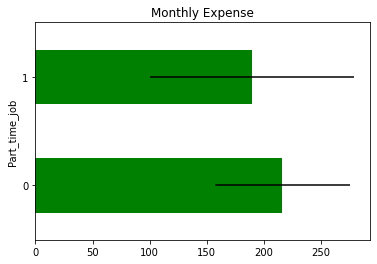

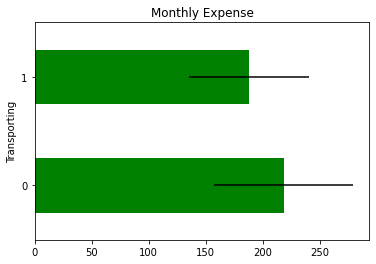

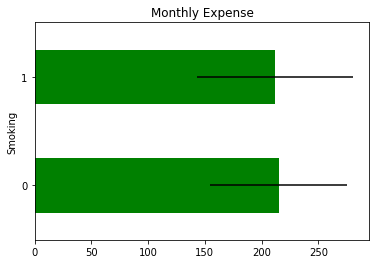

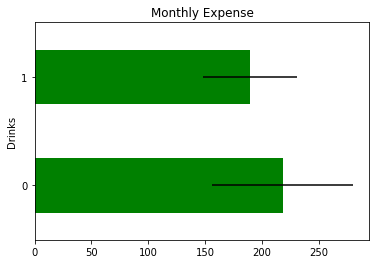

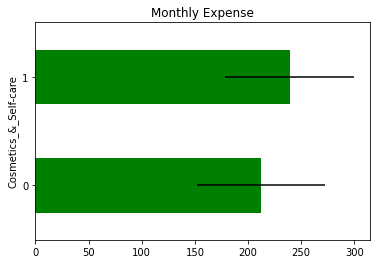

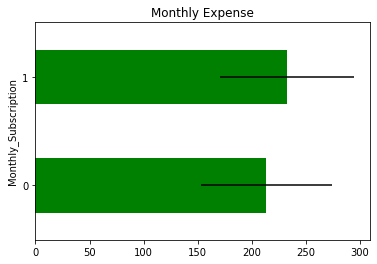

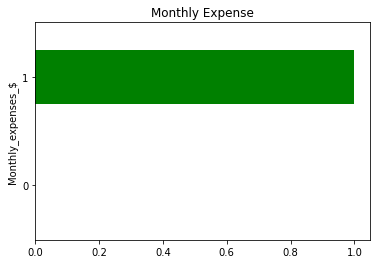

In [15]:
for var in vars_with_na:
    df2 = df.copy()
    df2[var] = np.where(df2[var].isnull(), 1, 0)
    tmp = df2.groupby(var)['Monthly_expenses_$'].agg(['mean', 'std'])
    tmp.plot(kind="barh", y="mean", legend=False,xerr="std", title="Monthly Expense", color='green')
    plt.show()

We observe that the mean and the standard do not vary extensively so we can substitute most frequently occuring values

Gender
Age
Study_year               
Living
Scholarship
Part_time_job
Transporting
Smoking
Drinks
Games_&_Hobbies
Cosmetics_&_Self-care
Monthly_Subscription